## https://www.mohfw.gov.in/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

ImportError: cannot import name 'ft2font' from 'matplotlib' (C:\Users\thyagaraj\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py)

In [3]:
path ='https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_india.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,States,Confirmed,Cured,Death,Active,Lat,Long
0,0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,3,Assam,2397,547,4,1846,26.2006,92.9376
4,4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [6]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
df.head()

,State,Total Confirmed Cases,Total Cured Cases,Total Death Cases,Lat,Long
0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586
1,Andhra Pradesh,1332,287,31,15.9129,79.7400
2,Arunachal Pradesh,1,1,0,28.2180,94.7278
3,Assam,38,29,1,26.2006,92.9376
4,Bihar,392,65,2,25.0961,85.3131


In [8]:
df.tail()

,State,Total Confirmed Cases,Total Cured Cases,Total Death Cases,Lat,Long
27,Telengana,1012,367,26,18.1124,79.0193
28,Tripura,2,2,0,23.9408,91.9882
29,Uttarakhand,55,36,0,30.0668,79.0193
30,Uttar Pradesh,2134,510,39,26.8467,80.9462
31,West Bengal,758,124,22,22.9868,87.8550


In [9]:
df = df.rename(columns={"Total Confirmed Cases":"Confirmed","Total Cured Cases":"Cured",
                        "Total Death Cases":"Deaths"})
df.head()

,State,Confirmed,Cured,Deaths,Lat,Long
0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586
1,Andhra Pradesh,1332,287,31,15.9129,79.7400
2,Arunachal Pradesh,1,1,0,28.2180,94.7278
3,Assam,38,29,1,26.2006,92.9376
4,Bihar,392,65,2,25.0961,85.3131


In [10]:
df['active'] = df['Confirmed']-df['Cured'] - df['Deaths']

In [11]:
df.head()

,State,Confirmed,Cured,Deaths,Lat,Long,active
0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586,18
1,Andhra Pradesh,1332,287,31,15.9129,79.7400,1014
2,Arunachal Pradesh,1,1,0,28.2180,94.7278,0
3,Assam,38,29,1,26.2006,92.9376,8
4,Bihar,392,65,2,25.0961,85.3131,325


In [12]:
df['Confirmed'].sum()

33050

In [33]:
total_active_cases = df.groupby('State')['active'].sum().sort_values(ascending=False).to_frame()
total_active_cases

,active
State,
Maharashtra,7890
Gujarat,3358
Delhi,2291
Madhya Pradesh,1971
Rajasthan,1619
Uttar Pradesh,1585
Andhra Pradesh,1014
Tamil Nadu,925
Telengana,619


In [34]:
total_active_cases.style.background_gradient(cmap='Blues')

,active
State,
Maharashtra,7890
Gujarat,3358
Delhi,2291
Madhya Pradesh,1971
Rajasthan,1619
Uttar Pradesh,1585
Andhra Pradesh,1014
Tamil Nadu,925
Telengana,619


In [35]:
total_active_cases.style.background_gradient(cmap='Blues')

,active
State,
Maharashtra,7890
Gujarat,3358
Delhi,2291
Madhya Pradesh,1971
Rajasthan,1619
Uttar Pradesh,1585
Andhra Pradesh,1014
Tamil Nadu,925
Telengana,619


In [36]:
df.head()

,State,Confirmed,Cured,Deaths,Lat,Long,active
0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586,18
1,Andhra Pradesh,1332,287,31,15.9129,79.7400,1014
2,Arunachal Pradesh,1,1,0,28.2180,94.7278,0
3,Assam,38,29,1,26.2006,92.9376,8
4,Bihar,392,65,2,25.0961,85.3131,325


In [38]:
data = df[['State','Confirmed','Cured']]
data.head()

,State,Confirmed,Cured
0,Andaman and Nicobar Islands,33,15
1,Andhra Pradesh,1332,287
2,Arunachal Pradesh,1,1
3,Assam,38,29
4,Bihar,392,65


In [39]:
data.sort_values("Confirmed",ascending=False,inplace=True)

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
data.head()

,State,Confirmed,Cured
18,Maharashtra,9915,1593
9,Gujarat,4082,527
7,Delhi,3439,1092
17,Madhya Pradesh,2561,461
25,Rajasthan,2438,768


In [41]:
type(data)

pandas.core.frame.DataFrame

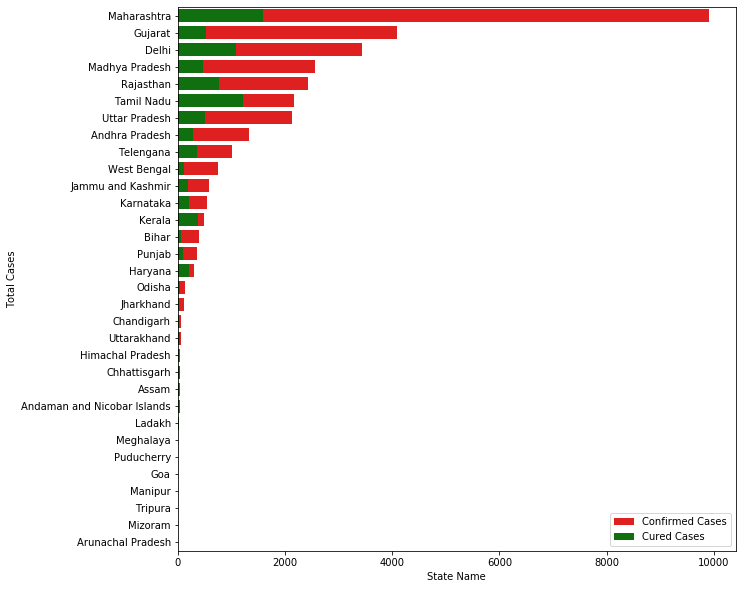

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(data['Confirmed'],data['State'],label="Confirmed Cases",color='red')
sns.barplot(data['Cured'],data['State'],label="Cured Cases",color='green')
plt.legend(loc=4)
plt.xlabel("State Name")
plt.ylabel("Total Cases")
plt.show()

In [ ]:
### https://www.kaggle.com/sudalairajkumar/covid19-in-india
### https://www.kaggle.com/sudalairajkumar/covid19-in-india

In [43]:
#### plot on india map

In [47]:
#### Plot on India Map
import folium
import numpy as np
# declaration of map 
india_map = folium.Map(location=[9,80], zoom_start= 4, max_zoom=5, height= 1000, width='100%')

for i in range(0, len(df[df['active']>0].index)):
    folium.Circle(
        location=[df.iloc[i]['Lat'], df.iloc[i]['Long']],
        radius=(int(np.log2(df.iloc[i]['active']+1.0001)))*15000,
        fill=True).add_to(india_map)
india_map

In [48]:
df.iloc[3]['Lat']

26.2006

In [49]:
#### Plot on India Map
import folium
import numpy as np
# declaration of map 
india_map = folium.Map(location=[9,80], zoom_start= 4, max_zoom=5, height= 1000, width='100%')

for i in range(0, len(df[df['active']>0].index)):
    folium.Circle(
        location=[df.iloc[i]['Lat'], df.iloc[i]['Long']], 
        radius=(int(np.log2(df.iloc[i]['active']+1.0001)))*15000,
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df.iloc[i].State+"</h5>"+
        "<li>active:   "+str(df.iloc[i]['active'])+"</li>"+
        "</ul>",
        fill=True).add_to(india_map)
india_map

In [51]:
len(df['active'])

32